In [52]:
import pandas as pd
import numpy as np
import seaborn
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

start_date='2010-04-20'
start_date='2010-04-27'
import matplotlib.pyplot as plt

In [38]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [39]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [40]:
Station = Base.classes.station
Measurement = Base.classes.measurement


In [41]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
session = Session(engine)

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER
id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [68]:
precipitation_data=session.query(Measurement.date,Measurement.prcp,Measurement.tobs ).filter(Measurement.date>'2016-08-23').all()








In [43]:
df = pd.DataFrame(precipitation_data)
df=df.set_index(df['date'])[['prcp','tobs']]
df.head()

,prcp,tobs
date,,
2016-08-24,0.08,79
2016-08-25,0.08,80
2016-08-26,0.00,79
2016-08-27,0.00,77
2016-08-28,0.01,78


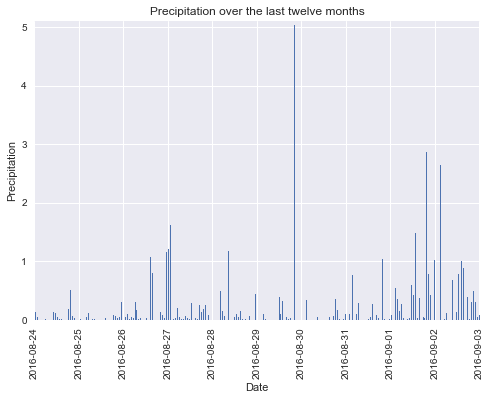

In [56]:
df['prcp'].plot(kind='bar')
plt.xticks(np.arange(1,len(df),int(len(df)/10)))
plt.xlabel(df.iloc[np.arange(1,len(df),int(len(df)/10))].index.values)
plt.ylim(0,5.1)
plt.title('Precipitation over the last twelve months')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.figure(figsize=(20,3))
plt.show()


In [66]:
print('Mean precipitation over the past twelve months was ' +str(df.mean()['prcp']) +'.')
print('Mean TOBS over the past twelve months was ' +str(df.mean()['tobs']) +'.')
print('Total precipitation over the past twelve months was ' +str(df.sum()['prcp']) +'.')



Mean precipitation over the past twelve months was 0.176461538462.
Mean TOBS over the past twelve months was 74.4843672457.
Total precipitation over the past twelve months was 355.57.


In [69]:
count_stations=session.query(Station).count()


In [91]:
session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]